In [1]:
import os
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
A = ['0','1','1','0']
B = ['1','0','1','0']
C = ['0','1','0','1']
D = ['1','0','0','1']
E = ['1','0','0','0']
X = pd.DataFrame({"A":A, "B":B, "C":C, "D":D})
y = pd.DataFrame({"E":E})
print("X=\n", X)
print("y:\n", y)
X = X.to_numpy()
y = y.to_numpy()
print("\nX=\n", X)
print("\ny:\n",y)

X=
    A  B  C  D
0  0  1  0  1
1  1  0  1  0
2  1  1  0  0
3  0  0  1  1
y:
    E
0  1
1  0
2  0
3  0

X=
 [['0' '1' '0' '1']
 ['1' '0' '1' '0']
 ['1' '1' '0' '0']
 ['0' '0' '1' '1']]

y:
 [['1']
 ['0']
 ['0']
 ['0']]


In [3]:
print("\nshape of X:\n", X.shape)
print("\nshape of y:\n", y.shape)
print("\ny[0]=\n",y[0])
y = y.astype(np.uint8)
print("\ny:\n",y)


shape of X:
 (4, 4)

shape of y:
 (4, 1)

y[0]=
 ['1']

y:
 [[1]
 [0]
 [0]
 [0]]


In [4]:
example_images = X[:4]
images_per_row = 4
instances = example_images
print("len(instances) = ",len(instances))
print("images_per_row = ", images_per_row)
print("instances:\n", instances)
print("type of example_images (instances):\n", type(instances))

len(instances) =  4
images_per_row =  4
instances:
 [['0' '1' '0' '1']
 ['1' '0' '1' '0']
 ['1' '1' '0' '0']
 ['0' '0' '1' '1']]
type of example_images (instances):
 <class 'numpy.ndarray'>


In [7]:
images_per_row = min(len(instances), images_per_row)
print("images_per_row = ", images_per_row)
size = 4
images = [instances.reshape(size, size) for instance in instances]
#for instance in instances:
#    instance.reshape(size, size)
#    print(instance)
print("images:\n", images)

images_per_row =  4
images:
 [array([['0', '1', '0', '1'],
       ['1', '0', '1', '0'],
       ['1', '1', '0', '0'],
       ['0', '0', '1', '1']], dtype=object), array([['0', '1', '0', '1'],
       ['1', '0', '1', '0'],
       ['1', '1', '0', '0'],
       ['0', '0', '1', '1']], dtype=object), array([['0', '1', '0', '1'],
       ['1', '0', '1', '0'],
       ['1', '1', '0', '0'],
       ['0', '0', '1', '1']], dtype=object), array([['0', '1', '0', '1'],
       ['1', '0', '1', '0'],
       ['1', '1', '0', '0'],
       ['0', '0', '1', '1']], dtype=object)]


In [8]:
n_rows = (len(instances) - 1) // (images_per_row) + 1
print("n_rows = ", n_rows)

n_rows =  1


In [9]:
n_empty = n_rows * images_per_row - len(instances)
print("n_empty=", n_empty)

n_empty= 0


In [10]:
images.append(np.zeros((size, size * n_empty)))
print("images:\n", images)
print("\ntype of images:\n", type(images))

images:
 [array([['0', '1', '0', '1'],
       ['1', '0', '1', '0'],
       ['1', '1', '0', '0'],
       ['0', '0', '1', '1']], dtype=object), array([['0', '1', '0', '1'],
       ['1', '0', '1', '0'],
       ['1', '1', '0', '0'],
       ['0', '0', '1', '1']], dtype=object), array([['0', '1', '0', '1'],
       ['1', '0', '1', '0'],
       ['1', '1', '0', '0'],
       ['0', '0', '1', '1']], dtype=object), array([['0', '1', '0', '1'],
       ['1', '0', '1', '0'],
       ['1', '1', '0', '0'],
       ['0', '0', '1', '1']], dtype=object), array([], shape=(4, 0), dtype=float64)]

type of images:
 <class 'list'>


In [11]:
row_images=[]
for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis = 1))
    print("row_images:\n", row_images)

row_images:
 [array([['0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
        '1', '0', '1'],
       ['1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1',
        '0', '1', '0'],
       ['1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1',
        '1', '0', '0'],
       ['0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
        '0', '1', '1']], dtype=object)]


In [12]:
image = np.concatenate(row_images, axis = 0)
print("type of image:\n", type(image))
print(image)
image = image.astype(np.uint8)
print("type of image:\n", type(image))
print(image)

type of image:
 <class 'numpy.ndarray'>
[['0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1']
 ['1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0']
 ['1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0']
 ['0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1']]
type of image:
 <class 'numpy.ndarray'>
[[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]]


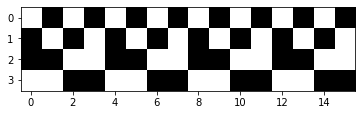

In [14]:
plt.imshow(image, cmap = mpl.cm.binary)

In [15]:
X = X.astype(np.uint8)
X

array([[0, 1, 0, 1],
       [1, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 1]], dtype=uint8)

In [16]:
y

array([[1],
       [0],
       [0],
       [0]], dtype=uint8)

In [17]:
X_train, X_test, y_train, y_test = X[:16], X[16:],y[:16], y[16:]
print("X_train:\n", X_train)
print("y_train:\n", y_train)

X_train:
 [[0 1 0 1]
 [1 0 1 0]
 [1 1 0 0]
 [0 0 1 1]]
y_train:
 [[1]
 [0]
 [0]
 [0]]


In [18]:
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)
print("y_train_1:\n", y_train_1)
print("\ny_test_1:\n", y_test_1)

y_train_1:
 [[ True]
 [False]
 [False]
 [False]]

y_test_1:
 []


In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3, random_state = 42)
sgd_clf.fit(X_train, y_train_1)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDClassifier(random_state=42)

In [22]:
some_digit = X[0]
sgd_clf.predict([some_digit])

array([ True])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv = 3, scoring = "accuracy")

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 725, in fit
    return self._fit(X, y, alpha=self

array([nan,  0.,  0.])

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_1):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_1[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_1[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: The number of classes has to be greater than one; got 1 class

In [31]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [32]:
never_1_clf = Never5Classifier()
cross_val_score(never_1_clf, X_train, y_train_1, cv = 3, scoring = "accuracy")

array([0.5, 1. , 1. ])

In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv = 3)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: The number of classes has to be greater than one; got 1 class

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_1, y_train_pred)

NameError: name 'y_train_pred' is not defined